In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

**Extract and  historical financial data using YFinance**
* TSLA provides potential high returns with high volatility.
* BND contributes stability and low risk.
* SPY offers diversified, moderate-risk market exposure.

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock symbols and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Fetch the data for each ticker with all relevant columns
data = yf.download(tickers, start=start_date, end=end_date)

# Create a dictionary to store individual DataFrames for each ticker with all required features
stock_data = {}

for ticker in tickers:
    # Select only the data for the specific ticker
    ticker_data = data.xs(ticker, axis=1, level=1)  # xs with level=1 gets the column specific to each ticker

    # Calculate the daily percentage change as a measure of volatility
    ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns

    # Store in dictionary
    stock_data[ticker] = ticker_data

# Example: Display the first few rows of each stock's DataFrame
for ticker, df in stock_data.items():
    print(f"{ticker} Data:")
    print(df.head())
    print("\n")


[*********************100%***********************]  3 of 3 completed


TSLA Data:
Price                      Adj Close      Close       High        Low  \
Date                                                                    
2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

Price                           Open    Volume  Volatility  
Date                                                        
2015-01-02 00:00:00+00:00  14.858000  71466000         NaN  
2015-01-05 00:00:00+00:00  14.303333  80527500   -0.042041  
2015-01-06 00:00:00+00:00  14.004000  93928500    0.005664  
2015-01-07 00:00:00+00:00  14.223333  44526000   -0.001562  
2015-01-08 00:00:00+00:00  14.187333  51637500   -0.001564  


BND Data:
Price                      Adj Close  

<ipython-input-2-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns
<ipython-input-2-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Volatility'] = ticker_data['Close'].pct_change()  # Daily returns
<ipython-input-2-a78e53145722>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

* The dataset includes
   - Date: Trading day timestamp.
   - Open, High, Low, Close: Daily price metrics, with Adj Close representing the adjusted close price to account for dividends and splits.
   - Volume: The total number of shares/units traded each day           
   - Volatility: calculated from rolling means and standard deviations to show how much the price varies over time.



In [ ]:
tsla_data = stock_data['TSLA']
tsla_data.index = pd.to_datetime(tsla_data.index, format='%y-%m-%d')
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,NaN
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.042041
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,0.005664
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,-0.001562
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,-0.001564


In [ ]:
tsla_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
count,2474.000000,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03,2473.000000
mean,111.438965,111.438965,113.895836,108.869421,111.461872,1.125745e+08,0.001799
std,110.120450,110.120450,112.643277,107.541830,110.208156,7.449619e+07,0.035802
min,9.578000,9.578000,10.331333,9.403333,9.488000,1.062000e+07,-0.210628
25%,17.066167,17.066167,17.368167,16.790167,17.058499,6.682590e+07,-0.016168
50%,25.043000,25.043000,25.279000,24.462334,24.986667,9.289395e+07,0.001259
75%,216.865002,216.865002,221.910004,212.084999,217.264999,1.301899e+08,0.018955
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08,0.219190


In [ ]:
tsla_data.isnull().sum()

,0
Price,
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Volatility,1


In [ ]:
tsla_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Volatility'], dtype='object', name='Price')

In [ ]:
bnd_data = stock_data['BND']
bnd_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,63.358784,82.650002,82.690002,82.419998,82.430000,2218800,NaN
2015-01-05 00:00:00+00:00,63.542751,82.889999,82.919998,82.699997,82.739998,5820100,0.002904
2015-01-06 00:00:00+00:00,63.726707,83.129997,83.379997,83.029999,83.029999,3887600,0.002895
2015-01-07 00:00:00+00:00,63.765068,83.180000,83.279999,83.050003,83.139999,2433400,0.000602
2015-01-08 00:00:00+00:00,63.665371,83.050003,83.110001,82.970001,83.110001,1873400,-0.001563


In [ ]:
bnd_data.isnull().sum()

,0
Price,
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Volatility,1


In [ ]:
spy_data = stock_data['SPY']
spy_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,173.173752,205.429993,206.880005,204.179993,206.380005,121465900,NaN
2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600,-0.018060
2015-01-06 00:00:00+00:00,168.444656,199.820007,202.720001,198.860001,202.089996,209151400,-0.009419
2015-01-07 00:00:00+00:00,170.543686,202.309998,202.720001,200.880005,201.419998,125346700,0.012461
2015-01-08 00:00:00+00:00,173.569962,205.899994,206.160004,203.990005,204.009995,147217800,0.017745


In [ ]:
spy_data

Price,Adj Close,Close,High,Low,Open,Volume,Volatility
Date,,,,,,,
2015-01-02 00:00:00+00:00,173.173752,205.429993,206.880005,204.179993,206.380005,121465900,NaN
2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600,-0.018060
2015-01-06 00:00:00+00:00,168.444656,199.820007,202.720001,198.860001,202.089996,209151400,-0.009419
2015-01-07 00:00:00+00:00,170.543686,202.309998,202.720001,200.880005,201.419998,125346700,0.012461
2015-01-08 00:00:00+00:00,173.569962,205.899994,206.160004,203.990005,204.009995,147217800,0.017745
...,...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,579.239990,579.239990,580.059998,576.570007,579.979980,34979900,0.002163
2024-10-25 00:00:00+00:00,579.039978,579.039978,584.460022,578.080017,581.510010,47268200,-0.000345
2024-10-28 00:00:00+00:00,580.830017,580.830017,582.710022,580.520020,582.580017,30174700,0.003091


**Statistical Distribution**

* Resample to weekly basis

In [ ]:
weekly_tsla_data= tsla_data.resample('W').mean()
weekly_bnd_data= bnd_data.resample('W').mean()
weekly_spy_data= spy_data.resample('W').mean()

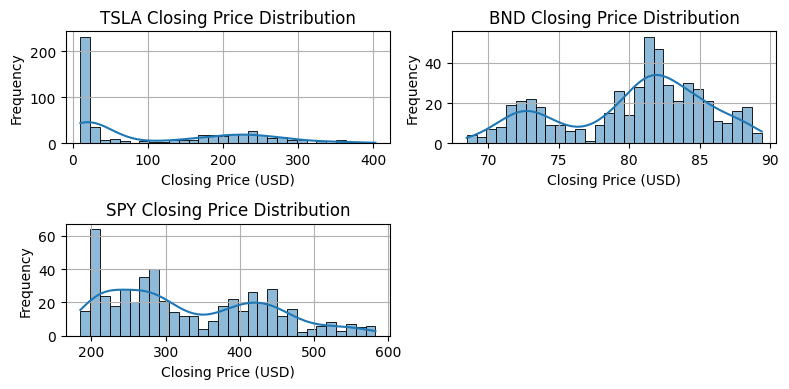

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the closing price data for each stock in a dictionary for easy access
dataframes = {
    'TSLA': weekly_tsla_data['Close'],
    'BND': weekly_bnd_data['Close'],
    'SPY': weekly_spy_data['Close'],
}

# Create a 2-row, 2-column grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes = axes.flatten()  # Flatten for easier indexing

# Iterate over each stock and plot its distribution
for i, (stock_name, close_data) in enumerate(dataframes.items()):
    sns.histplot(close_data, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{stock_name} Closing Price Distribution')
    axes[i].set_xlabel('Closing Price (USD)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide the last subplot if there are only 3 stocks
if len(dataframes) < 4:
    fig.delaxes(axes[3])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


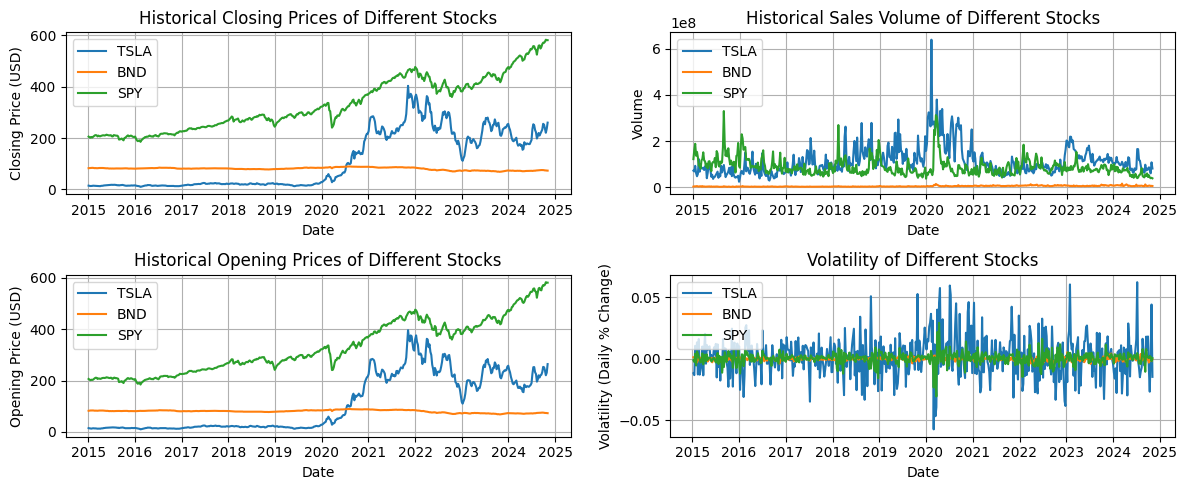

In [ ]:
import matplotlib.pyplot as plt

# Assuming weekly data is already created for each stock
dataframes = {
    'TSLA': weekly_tsla_data,
    'BND': weekly_bnd_data,
    'SPY': weekly_spy_data,
}

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 5))

# Plot the closing prices in the first subplot (ax1)
for stock_name, df in dataframes.items():
    ax1.plot(df['Close'], label=stock_name)

ax1.set_title('Historical Closing Prices of Different Stocks')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the sales volume in the second subplot (ax2)
for stock_name, df in dataframes.items():
    ax2.plot(df['Volume'], label=stock_name)

ax2.set_title('Historical Sales Volume of Different Stocks')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper left')
ax2.grid(True)

# Plot the opening prices in the third subplot (ax3)
for stock_name, df in dataframes.items():
    ax3.plot(df['Open'], label=stock_name)

ax3.set_title('Historical Opening Prices of Different Stocks')
ax3.set_xlabel('Date')
ax3.set_ylabel('Opening Price (USD)')
ax3.legend(loc='upper left')
ax3.grid(True)

# Plot the volatility in the fourth subplot (ax4)
for stock_name, df in dataframes.items():
    ax4.plot(df['Volatility'], label=stock_name)

ax4.set_title('Volatility of Different Stocks')
ax4.set_xlabel('Date')
ax4.set_ylabel('Volatility (Daily % Change)')
ax4.legend(loc='upper left')
ax4.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Trend and Seasonality**

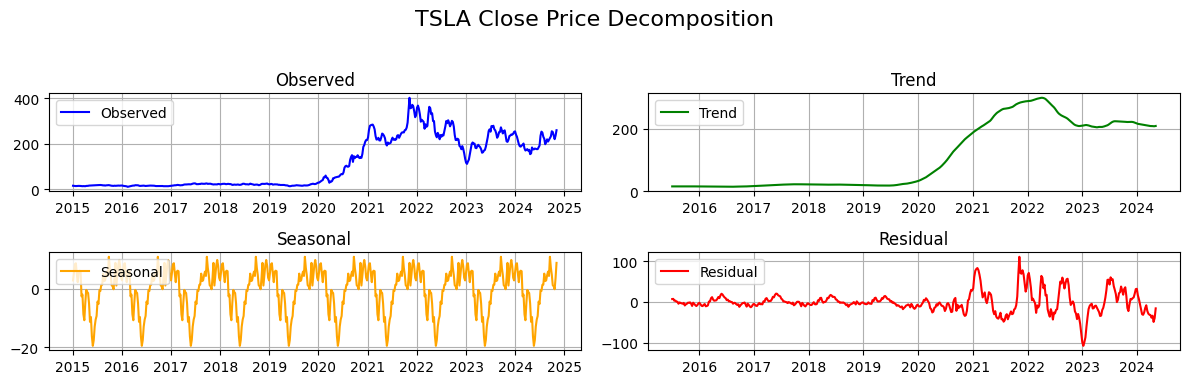

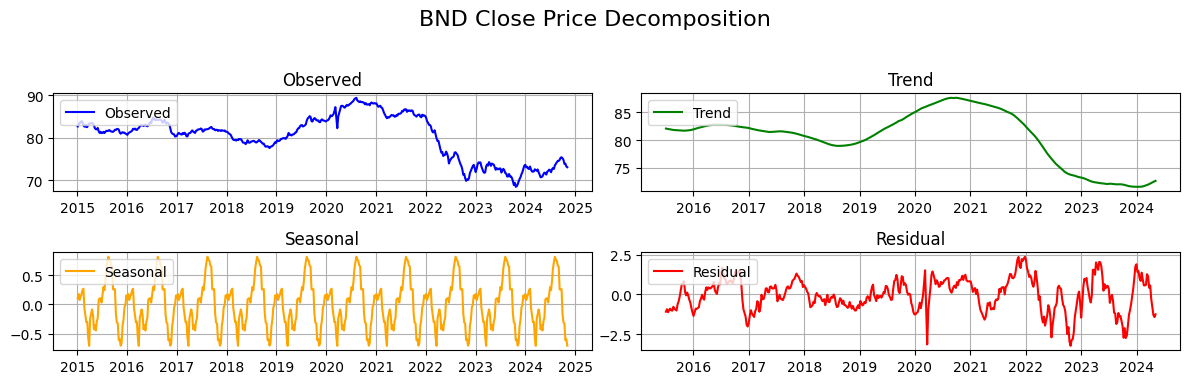

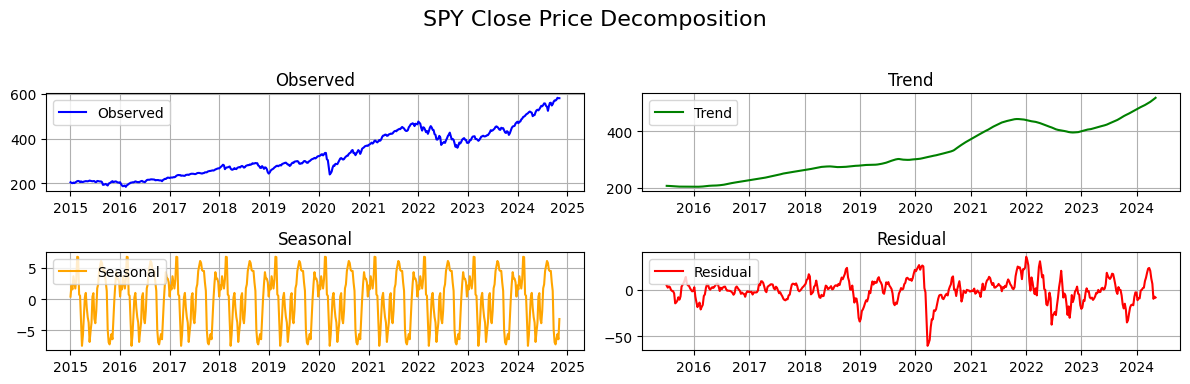

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming weekly data is already created for each stock's 'Close' feature
dataframes = {
    'TSLA': weekly_tsla_data,
    'BND': weekly_bnd_data,
    'SPY': weekly_spy_data,
}

# Set the decomposition frequency based on your data's seasonality (e.g., 52 for weekly data in yearly seasonality)
decomposition_frequency = 52

# Decompose and plot each stock's time series
for stock_name, df in dataframes.items():
    # Perform decomposition
    decomposition = seasonal_decompose(df['Close'], model='additive', period=decomposition_frequency)

    # Plot the decomposition with two rows (Observed + Trend in row 1, Seasonal + Residual in row 2)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 4))
    fig.suptitle(f'{stock_name} Close Price Decomposition', fontsize=16)

    # Plot observed (original time series) in the first row, first column
    ax1.plot(df['Close'], label='Observed', color='blue')
    ax1.set_title('Observed')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Plot trend component in the first row, second column
    ax2.plot(decomposition.trend, label='Trend', color='green')
    ax2.set_title('Trend')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    # Plot seasonal component in the second row, first column
    ax3.plot(decomposition.seasonal, label='Seasonal', color='orange')
    ax3.set_title('Seasonal')
    ax3.legend(loc='upper left')
    ax3.grid(True)

    # Plot residual component in the second row, second column
    ax4.plot(decomposition.resid, label='Residual', color='red')
    ax4.set_title('Residual')
    ax4.legend(loc='upper left')
    ax4.grid(True)

    # Adjust layout to prevent overlap and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


**Volatility Analysis**

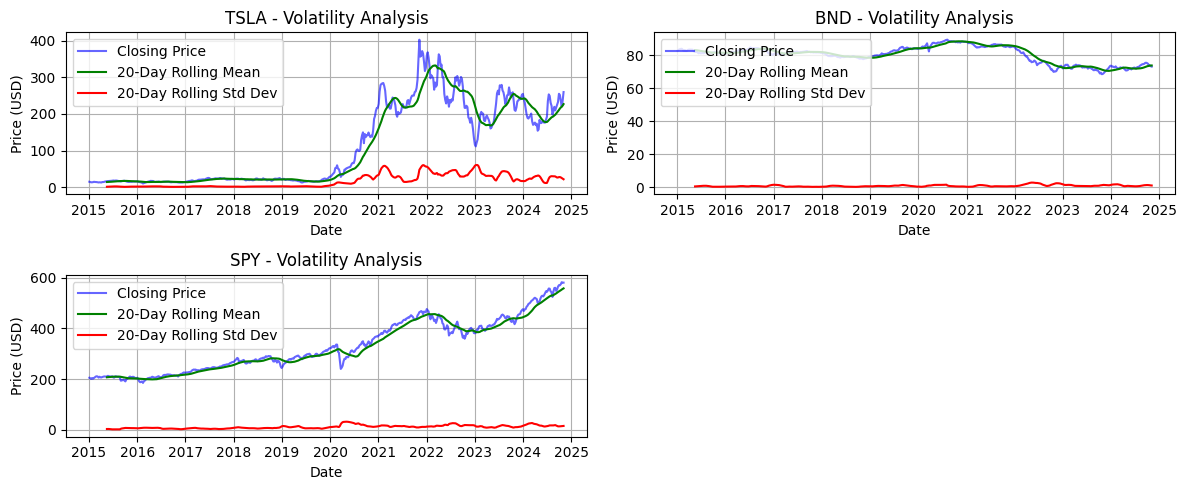

In [ ]:
import matplotlib.pyplot as plt

# Define the rolling window size (e.g., 20 days for a monthly analysis)
rolling_window = 20

# Store DataFrames in a dictionary for each stock with rolling statistics added
dataframes = {
    'TSLA': weekly_tsla_data,
    'BND': weekly_bnd_data,
    'SPY': weekly_spy_data,
}

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over the stocks and plot in the 2x2 layout
for i, (stock_name, df) in enumerate(dataframes.items()):
    # Calculate rolling mean and rolling standard deviation
    df['Rolling Mean'] = df['Close'].rolling(window=rolling_window).mean()
    df['Rolling Std Dev'] = df['Close'].rolling(window=rolling_window).std()

    # Plot closing price, rolling mean, and rolling standard deviation
    axes[i].plot(df['Close'], label='Closing Price', color='blue', alpha=0.6)
    axes[i].plot(df['Rolling Mean'], label=f'{rolling_window}-Day Rolling Mean', color='green')
    axes[i].plot(df['Rolling Std Dev'], label=f'{rolling_window}-Day Rolling Std Dev', color='red')

    # Set titles and labels
    axes[i].set_title(f'{stock_name} - Volatility Analysis')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend(loc='upper left')
    axes[i].grid(True)

# Hide any unused subplot (if data for 3 stocks, one subplot remains empty)
if len(dataframes) < 4:
    for j in range(len(dataframes), 4):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()
